In [1]:
MAIN_PATH = "/home/carlos/MasterDS/tfm"
JSON_DATA_PATH = '{}/data/json/'.format(MAIN_PATH)
CSV_DATA_PATH = '{}/data/csv/'.format(MAIN_PATH)

In [2]:
import sys
sys.path.insert(0, MAIN_PATH)

In [3]:
%load_ext autoreload
%autoreload 2
from scripts.extractive_summary.ltr.ltr_features_targets import LTRFeaturesTargets
from scripts.text.article_text_processor import ArticleTextProcessor

from scripts.conf import TEAMS
%reload_ext autoreload

In [4]:
from pandas_profiling import ProfileReport
import pandas as pd

# Exploratorio dataset generado

Antes de empezar a entrenar algún modelo, conviene examinar las distribuciones de las features y los scores que se acaban de generar.

Se han generado distintos targets, por lo que se estudiará cada caso por separado.

In [5]:
key_events = ['goal', 'red_card', 'penalty']
lags = [1, 3, 5]
target_metric = 'cosine_emb'
drop_teams = True
lemma = True
metric_params = {'embedding': 'distilroberta-base-paraphrase-v1',
                'text_process': 'basic'}
#metric_params = {'rouge_mode': 'rouge-1', 'rouge_metric': 'r'}
#metric_params = {'ngram_range': (1, 2), 'strip_accents': 'unicode'}
count_vec_kwargs = {'ngram_range': (1, 2), 'strip_accents': 'unicode'}

train_perc = 0.7
val_perc = 0.2

In [6]:
ltr = LTRFeaturesTargets(target_metric=target_metric, 
                        key_events=key_events,
                        lags=lags,
                        metric_params=metric_params,
                        count_vec_kwargs=count_vec_kwargs,
                        drop_teams=drop_teams,
                        lemma=lemma)

Setting target metric to cosine_emb


In [7]:
ltr.run_target_features()

/home/carlos/MasterDS/tfm/data/ltr/features_targets/c03ce6bcfa/features_targets.csv already exists


In [8]:
ltr.train_val_test_split(train_perc=train_perc, val_perc=val_perc)

In [7]:
pd_train = ltr.read_train()

Reading /home/carlos/MasterDS/tfm/data/ltr/features_targets/c03ce6bcfa/train.csv


In [10]:
cols_2_drop = ['url', 'json_file', 'event_ix', 'sentence_ix']
cat_cols = ['is_key_event', 'advantage', 'equalize']
num_cols = sorted(list(set(pd_train.columns).difference(set(cat_cols + cols_2_drop))))

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
pd_train_proc = pd_train.copy()
pd_train_proc['sim_previous_1_cat'] = pd_train_proc['sim_previous_1'].apply(lambda x: '0' if x==0 else '1')
pd_train_proc['n_players_cat'] = pd_train_proc['n_players'].apply(lambda x: 'no_player' if x==0 else 'one_player' if x==1 else 'more_than_one_player')

In [9]:
cols_2_plot = ['n_players_cat', 'is_key_event', 'sim_previous_1_cat']

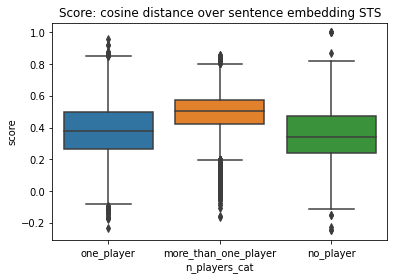

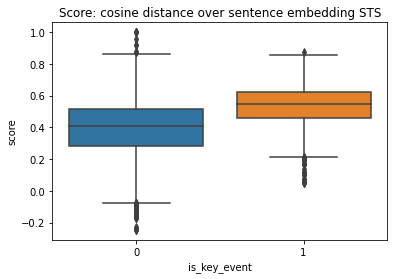

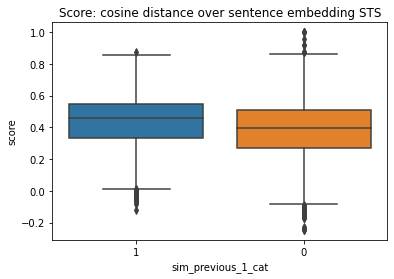

In [17]:
for col in cols_2_plot:
    plt.figure()
    sns.boxplot(x=col,y='score', data=pd_train_proc)
    plt.title('Score: cosine distance over sentence embedding STS')
    plt.show()

In [11]:
pd_train

length  n_stop  is_key_event  n_players  players_importance  \
0            7       3             0          1            0.000047   
1            3       1             0          1            0.001084   
2           15      10             0          2            0.003998   
3            4       1             0          1            0.000291   
4            3       1             0          1            0.001004   
...        ...     ...           ...        ...                 ...   
296655       6       3             0          1            0.000217   
296656       7       4             0          1            0.006701   
296657       8       4             0          1            0.000036   
296658       3       1             0          1            0.001069   
296659       3       1             0          1            0.000922   

        advantage  equalize  position  tfidf_sum  sim_previous_1  \
0               0         0  0.494624   3.512653        0.046495   
1               0         0  0.360000   2.198599        0.000000   
2               0         0  0.670732   5.068378        0.000000   
3               0         0  0.450549   2.558036        0.000000   
4               0         0  0.254902   2.188177        0.000000   
...           ...       ...       ...        ...             ...   
296655          0         0  0.084906   3.147186        0.000000   
296656          0         0  0.066667   3.549072        0.000000   
296657          0         0  0.045802   3.655166        0.000000   
296658          0         0  0.114286   2.206885        1.000000   
296659          0         0  0.792453   2.196698        0.000000   

        sim_previous_3  sim_previous_5  event_ix  \
0             0.000000        0.000000        45   
1             0.078650        0.095219        26   
2             0.000000        0.184220        54   
3             0.000000        0.189163        40   
4             0.071091        0.000000        25   
...                ...             ...       ...   
296655        0.000000        0.000000         8   
296656        0.000000        0.000000         5   
296657        0.000000        0.000000         5   
296658        0.000000        0.000000        11   
296659        0.000000        0.284693        83   

                                                      url  \
0             https://www.bbc.com/sport/football/50869592   
1                http://www.premierleague.com/match/46691   
2       https://matchcenter.mlssoccer.com/matchcenter/...   
3       https://matchcenter.mlssoccer.com/matchcenter/...   
4       https://matchcenter.mlssoccer.com/matchcenter/...   
...                                                   ...   
296655  https://matchcenter.mlssoccer.com/matchcenter/...   
296656           http://www.premierleague.com/match/38516   
296657   https://www.espn.com/soccer/report?gameId=491517   
296658  https://matchcenter.mlssoccer.com/matchcenter/...   
296659  https://matchcenter.mlssoccer.com/matchcenter/...   

                             json_file  sentence_ix     score  
0       italian_serie_a_2019_2020.json            1  0.300172  
1        premier_league_2019_2020.json            8  0.178952  
2                   mls_2019_2020.json            6  0.408791  
3                   mls_2016_2017.json            0  0.438142  
4                   mls_2017_2018.json            2  0.156053  
...                                ...          ...       ...  
296655              mls_2019_2020.json            8  0.378528  
296656   premier_league_2018_2019.json            3  0.445381  
296657  italian_serie_a_2017_2018.json            5  0.334733  
296658              mls_2017_2018.json            1  0.182299  
296659              mls_2018_2019.json           10  0.306296  

[296660 rows x 17 columns]

### Columnas numéricas

- Es importante recalcar que el score está entre 0 y 1. Además no parece que tenga muchos outliers
- La posición está escalada entre 0 y 1
- Como mucho aparecen 3 jugadores en un evento. Hay eventos sin jugadores (no debería)

In [12]:
pd_train[num_cols].describe()

length      n_players         n_stop  players_importance  \
count  296660.000000  296660.000000  296660.000000       296660.000000   
mean        6.817411       1.141822       3.460746            0.001221   
std         4.175666       0.546584       3.011055            0.002093   
min         1.000000       0.000000       0.000000            0.000000   
25%         3.000000       1.000000       1.000000            0.000167   
50%         6.000000       1.000000       3.000000            0.000686   
75%         9.000000       1.000000       4.000000            0.001576   
max        22.000000       3.000000      16.000000            0.173469   

            position          score  sim_previous_1  sim_previous_3  \
count  296660.000000  296660.000000   296660.000000   296660.000000   
mean        0.505045       0.328604        0.052120        0.064498   
std         0.288840       0.103593        0.126489        0.143787   
min         0.005682      -0.045929        0.000000        0.000000   
25%         0.254902       0.254098        0.000000        0.000000   
50%         0.505155       0.324057        0.000000        0.000000   
75%         0.755319       0.396718        0.027088        0.060442   
max         1.000000       1.000000        1.000000        1.000000   

       sim_previous_5      tfidf_sum  
count   296660.000000  296660.000000  
mean         0.060934       3.235194  
std          0.139923       1.046254  
min          0.000000       0.000000  
25%          0.000000       2.207228  
50%          0.000000       3.218973  
75%          0.046001       3.854086  
max          1.000000       6.417615

In [13]:
pd_train['score'].describe()

count    296660.000000
mean          0.328604
std           0.103593
min          -0.045929
25%           0.254098
50%           0.324057
75%           0.396718
max           1.000000
Name: score, dtype: float64

Estas habría que fijarlas a 0, son muy poquitas

In [14]:
len(pd_train[pd_train.score<0])

15

In [15]:
profile = ProfileReport(pd_train.drop(cols_2_drop, axis=1), title='Pandas Profiling Report', explorative=True)
profile.to_notebook_iframe()

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
pd_train_proc = pd_train.copy()
pd_train_proc['sim_previous_1_cat'] = pd_train_proc['sim_previous_1'].apply(lambda x: '0' if x==0 else '1')
pd_train_proc['n_players_cat'] = pd_train_proc['n_players'].apply(lambda x: 'no_player' if x==0 else 'one_player' if x==1 else 'more_than_one_player')

In [10]:
cols_2_plot = ['n_players_cat', 'is_key_event', 'sim_previous_1_cat']

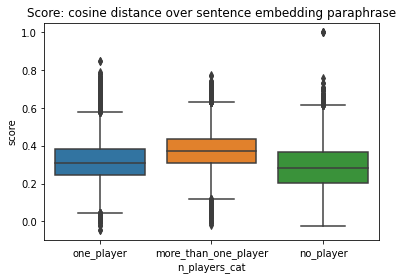

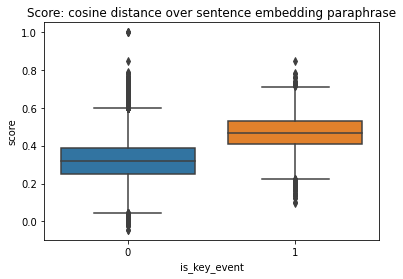

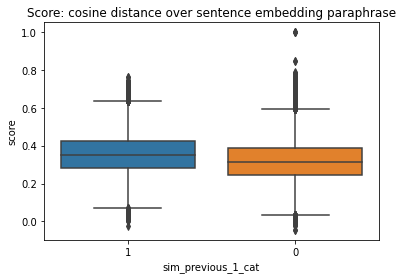

In [11]:
for col in cols_2_plot:
    plt.figure()
    sns.boxplot(x=col,y='score', data=pd_train_proc)
    plt.title('Score: cosine distance over sentence embedding paraphrase')
    plt.show()